# Tarea 2: Reducción de dimensionalidad con PCA

Este notebook implementa el análisis de componentes principales (PCA) para reducir la dimensionalidad del dataset Iris de 4 características a 2 dimensiones.

In [1]:
# Importar las bibliotecas necesarias para el análisis de datos y visualización
import numpy as np      # Numpy: para operaciones numéricas y arrays
import pandas as pd     # Pandas: para manejo y análisis de datos estructurados
import matplotlib.pyplot as plt    # Matplotlib: para crear gráficos y visualizaciones
from sklearn.datasets import load_iris     # Cargar el dataset Iris incluido en scikit-learn
from sklearn.preprocessing import StandardScaler    # Estandarizar las variables (media 0, varianza 1)
from sklearn.decomposition import PCA      # Implementación de PCA para reducir dimensionalidad

## 1. Carga del Dataset

In [2]:
# Cargar el dataset Iris desde scikit-learn
iris = load_iris()
datos_X = iris.data    # Extraer matriz de características: 4 columnas con medidas de flores
especies_y = iris.target  # Extraer vector objetivo: números 0, 1, 2 representando especies
nombres_especies = iris.target_names  # Obtener nombres de las especies: setosa, versicolor, virginica

# Mostrar las primeras 5 muestras para entender la estructura del dataset
print("Primeras 5 muestras del dataset Iris:")
print(pd.DataFrame(datos_X[:5], columns=iris.feature_names))    # Convertir a DataFrame para mejor visualización
print("\nEspecies correspondientes:")
print([nombres_especies[i] for i in especies_y[:5]])    # Mostrar nombres en lugar de números

Primeras 5 muestras del dataset Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Especies correspondientes:
[np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa'), np.str_('setosa')]


## 2. Preprocesamiento

In [3]:
# Crear un objeto de estandarización para normalizar los datos
escalador = StandardScaler()
# Aplicar la estandarización: restar la media y dividir por la desviación estándar
datos_escalados = escalador.fit_transform(datos_X)    # Este paso es fundamental antes de aplicar PCA

# Verificar que la estandarización se aplicó correctamente
print("\nMedia de cada característica después de estandarizar:")
print(np.mean(datos_escalados, axis=0))  # Calcular media por columna, debería ser aproximadamente 0
print("\nVarianza de cada característica después de estandarizar:")
print(np.var(datos_escalados, axis=0))   # Calcular varianza por columna, debería ser aproximadamente 1


Media de cada característica después de estandarizar:
[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]

Varianza de cada característica después de estandarizar:
[1. 1. 1. 1.]


## 3. Aplicación de PCA

In [4]:
# Crear un objeto PCA indicando que queremos reducir a 2 componentes principales
modelo_pca = PCA(n_components=2)
# Aplicar PCA a los datos estandarizados y transformarlos al nuevo espacio bidimensional
datos_pca = modelo_pca.fit_transform(datos_escalados)    # datos_pca ahora tiene solo 2 columnas en lugar de 4

# Analizar cuánta información (varianza) conservan los componentes principales
varianza_explicada = modelo_pca.explained_variance_ratio_ * 100    # Convertir a porcentaje
print("\nVarianza explicada por cada componente (%):")
print(f"Primer componente: {varianza_explicada[0]:.2f}%")    # Primer componente principal
print(f"Segundo componente: {varianza_explicada[1]:.2f}%")    # Segundo componente principal
print(f"Total: {np.sum(varianza_explicada):.2f}%")    # Suma de ambos componentes


Varianza explicada por cada componente (%):
Primer componente: 72.96%
Segundo componente: 22.85%
Total: 95.81%


## 4. Visualización

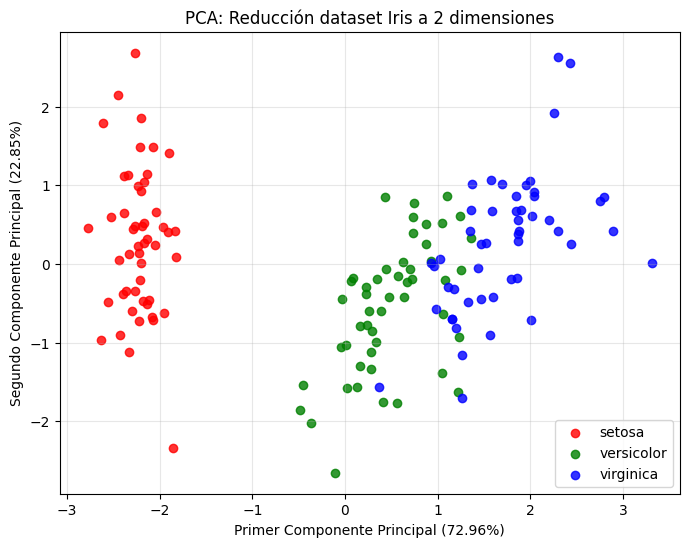

In [5]:
# Crear una figura para el gráfico con tamaño personalizado
plt.figure(figsize=(8, 6))
# Definir colores para las diferentes especies
colores = ['red', 'green', 'blue']    # Un color para cada especie
# Usar los nombres de especies del dataset
nombres_especies = iris.target_names

# Recorrer cada especie y graficarla con un color distinto
for i, color in enumerate(colores):
    # Filtrar los datos de cada especie y graficarlos
    plt.scatter(datos_pca[especies_y == i, 0], datos_pca[especies_y == i, 1],    # Usar la primera columna para X, segunda para Y
                color=color, alpha=0.8, lw=1,    # Establecer color, transparencia y grosor
                label=nombres_especies[i])    # Etiquetar cada especie

# Añadir título y etiquetas a los ejes con información de varianza explicada
plt.title('PCA: Reducción dataset Iris a 2 dimensiones')
plt.xlabel(f'Primer Componente Principal ({varianza_explicada[0]:.2f}%)')    # Incluir % de varianza
plt.ylabel(f'Segundo Componente Principal ({varianza_explicada[1]:.2f}%)')
plt.legend(loc='best')    # Añadir leyenda en la mejor ubicación
plt.grid(True, alpha=0.3)    # Añadir cuadrícula para mejor lectura
plt.show()    # Mostrar el gráfico

## 5. Reflexión

Después de ejecutar el código anterior, responde a las siguientes preguntas:

1. ¿Cómo se distribuyen las tres especies de iris en el espacio bidimensional?
2. ¿Qué porcentaje de la varianza total captura cada componente principal?
3. ¿Consideras que la reducción de dimensionalidad con PCA fue efectiva? ¿Por qué?

# **1. ¿Cómo se distribuyen las tres especies de iris en el espacio bidimensional?**


Observando el gráfico resultante del PCA, podemos ver que:

La especie Iris setosa (en rojo) está claramente separada de las otras dos especies(versicolor y virginica). Forma un grupo compacto y diferenciado en la parte izquierda del gráfico.

Las especies Iris versicolor (en verde) e Iris virginica (en azul) están en su mayoría separadas aúnque más cercanas entre sí, con cierto solapamiento,

Esta distribución indica que setosa tiene características morfológicas muy distintivas que la diferencian completamente de las otras dos especies, mientras que versicolor y virginica comparten más similitudes entre sí, aunque con suficientes diferencias para permitir cierta separación en el espacio bidimensional.


# **¿Qué porcentaje de la varianza total captura cada componente principal?**


Según los resultados mostrados en la sección 3 del notebook:

*   El primer componente principal captura el 72.96% de la varianza total.
*   El segundo componente principal captura el 22.85% de la varianza total.

En conjunto, los dos componentes principales capturan el 95.81% de la varianza total del dataset original. Se deduce, por lo tanto, que al reducir las 4 dimensiones originales (longitud y ancho de sépalos y pétalos) a solo 2 dimensiones, conservamos más del 95% de la información original.

# 3. ¿Consideras que la reducción de dimensionalidad con PCA fue efectiva?¿Por qué?

Sí, la reducción de dimensionalidad con PCA fue muy efectiva por varias razones:


*   ***Alta conservación de información***: Los dos primeros componentes principales capturan el 95.81% de la varianza total, lo que significa que apenas se pierde información al aplicar la reducción de dimensiones.
*   ***Visualización clara***: La representación bidimensional permite visualizar claramente la separación entre las tres especies de iris.
*   ***Separabilidad de clases***: A pesar de la reducción de dimensiones, se mantiene la capacidad de distinguir entre las tres especies, con setosa completamente separada y gran porcentaje de separación entre versicolor y virginica.
*   ***Simplificación del análisis***: Al reducir a dos dimensiones, se simplifica enormemente cualquier análisis posterior o aplicación de algoritmos de clasificación, consiguiendo mantener en su mayoría la estructura esencial de los datos.
